In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
english_monarchs_marriages_df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-08-20/english_monarchs_marriages_df.csv')

In [14]:
english_monarchs_marriages_df.columns

Index(['king_name', 'king_age', 'consort_name', 'consort_age',
       'year_of_marriage', 'age_difference'],
      dtype='object')

In [12]:
# Set the style for our plots
plt.style.use('ggplot')

Monarch with most marriages: Henry VIII (6 marriages)


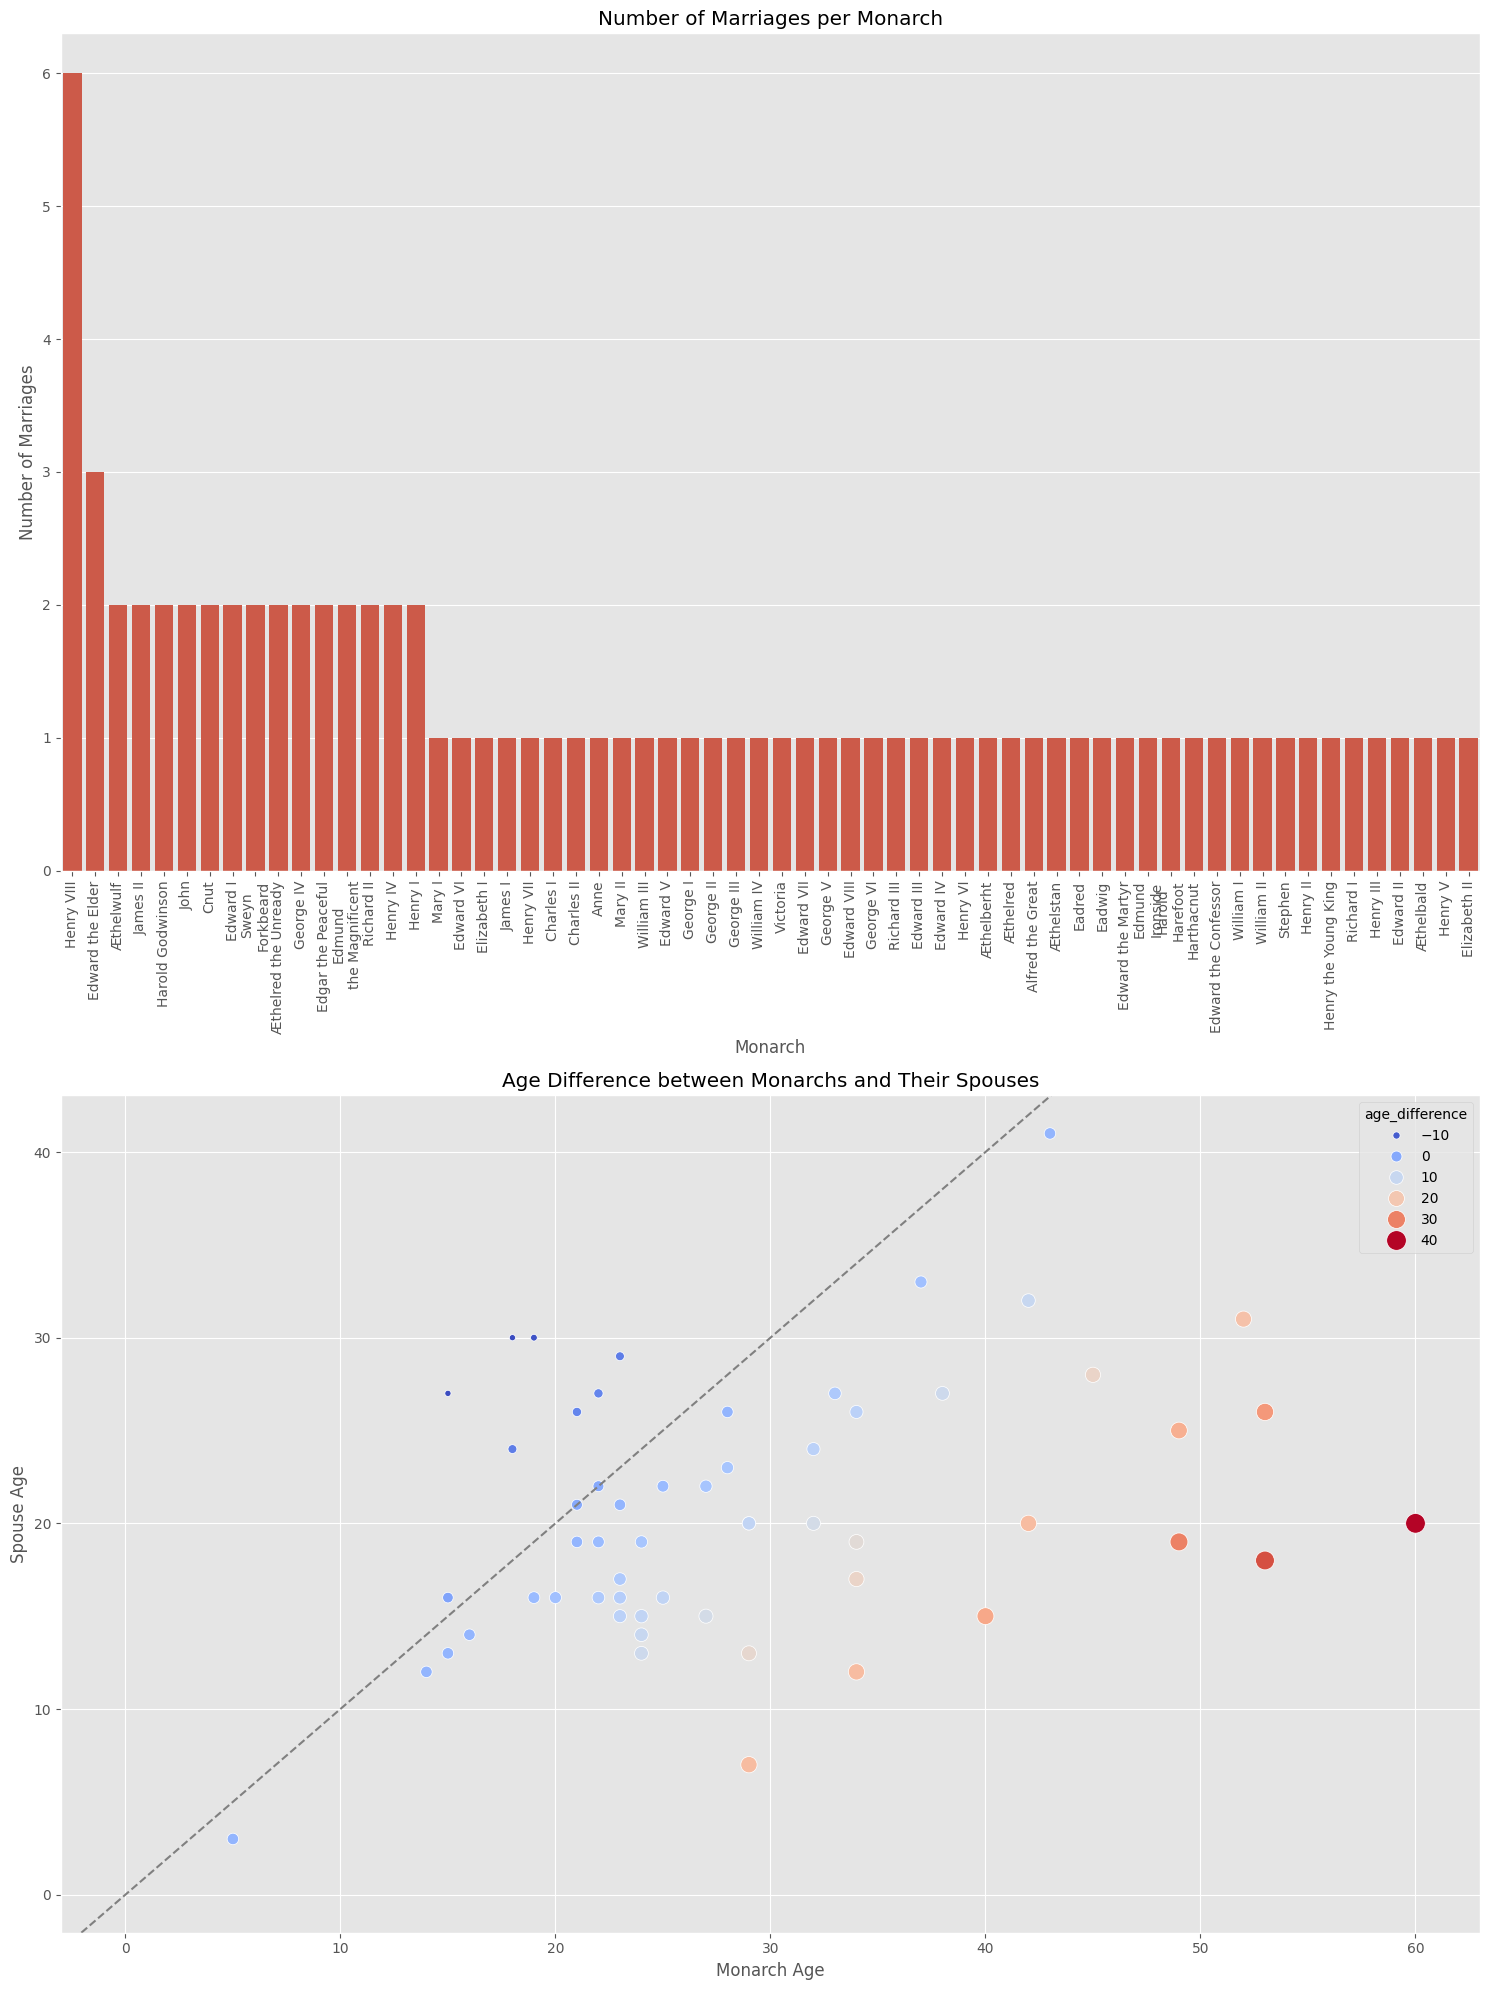

Total number of marriages: 83
Monarch with most marriages: Henry VIII (6 marriages)
Average age of monarchs at marriage: 28.42 years
Average age of spouses at marriage: 20.45 years
Largest age difference: 40.00 years


In [13]:

# Create a figure with multiple subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))

# Set the correct column name for monarchs
monarch_column = 'king_name'

# Update the visualization code
marriage_counts = english_monarchs_marriages_df[monarch_column].value_counts()
sns.barplot(x=marriage_counts.index, y=marriage_counts.values, ax=ax1)
ax1.set_title('Number of Marriages per Monarch')
ax1.set_xlabel('Monarch')
ax1.set_ylabel('Number of Marriages')
ax1.tick_params(axis='x', rotation=90)

# Update the print statement
print(f"Monarch with most marriages: {marriage_counts.index[0]} ({marriage_counts.values[0]} marriages)")

# Convert age columns to numeric, replacing non-numeric values with NaN
english_monarchs_marriages_df['king_age'] = pd.to_numeric(english_monarchs_marriages_df['king_age'], errors='coerce')
english_monarchs_marriages_df['consort_age'] = pd.to_numeric(english_monarchs_marriages_df['consort_age'], errors='coerce')

# 2. Visualize the age difference between monarchs and their spouses
english_monarchs_marriages_df['age_difference'] = english_monarchs_marriages_df['king_age'] - english_monarchs_marriages_df['consort_age']
sns.scatterplot(data=english_monarchs_marriages_df.dropna(subset=['king_age', 'consort_age']), 
                x='king_age', y='consort_age', hue='age_difference', 
                size='age_difference', sizes=(20, 200), palette='coolwarm', ax=ax2)
ax2.set_title('Age Difference between Monarchs and Their Spouses')
ax2.set_xlabel('Monarch Age')
ax2.set_ylabel('Spouse Age')
ax2.axline([0, 0], [1, 1], color='gray', linestyle='--')  # Add diagonal line for reference

plt.tight_layout()
plt.show()

# Print some interesting statistics
print(f"Total number of marriages: {len(english_monarchs_marriages_df)}")
print(f"Monarch with most marriages: {marriage_counts.index[0]} ({marriage_counts.values[0]} marriages)")
print(f"Average age of monarchs at marriage: {english_monarchs_marriages_df['king_age'].mean():.2f} years")
print(f"Average age of spouses at marriage: {english_monarchs_marriages_df['consort_age'].mean():.2f} years")
print(f"Largest age difference: {english_monarchs_marriages_df['age_difference'].abs().max():.2f} years")


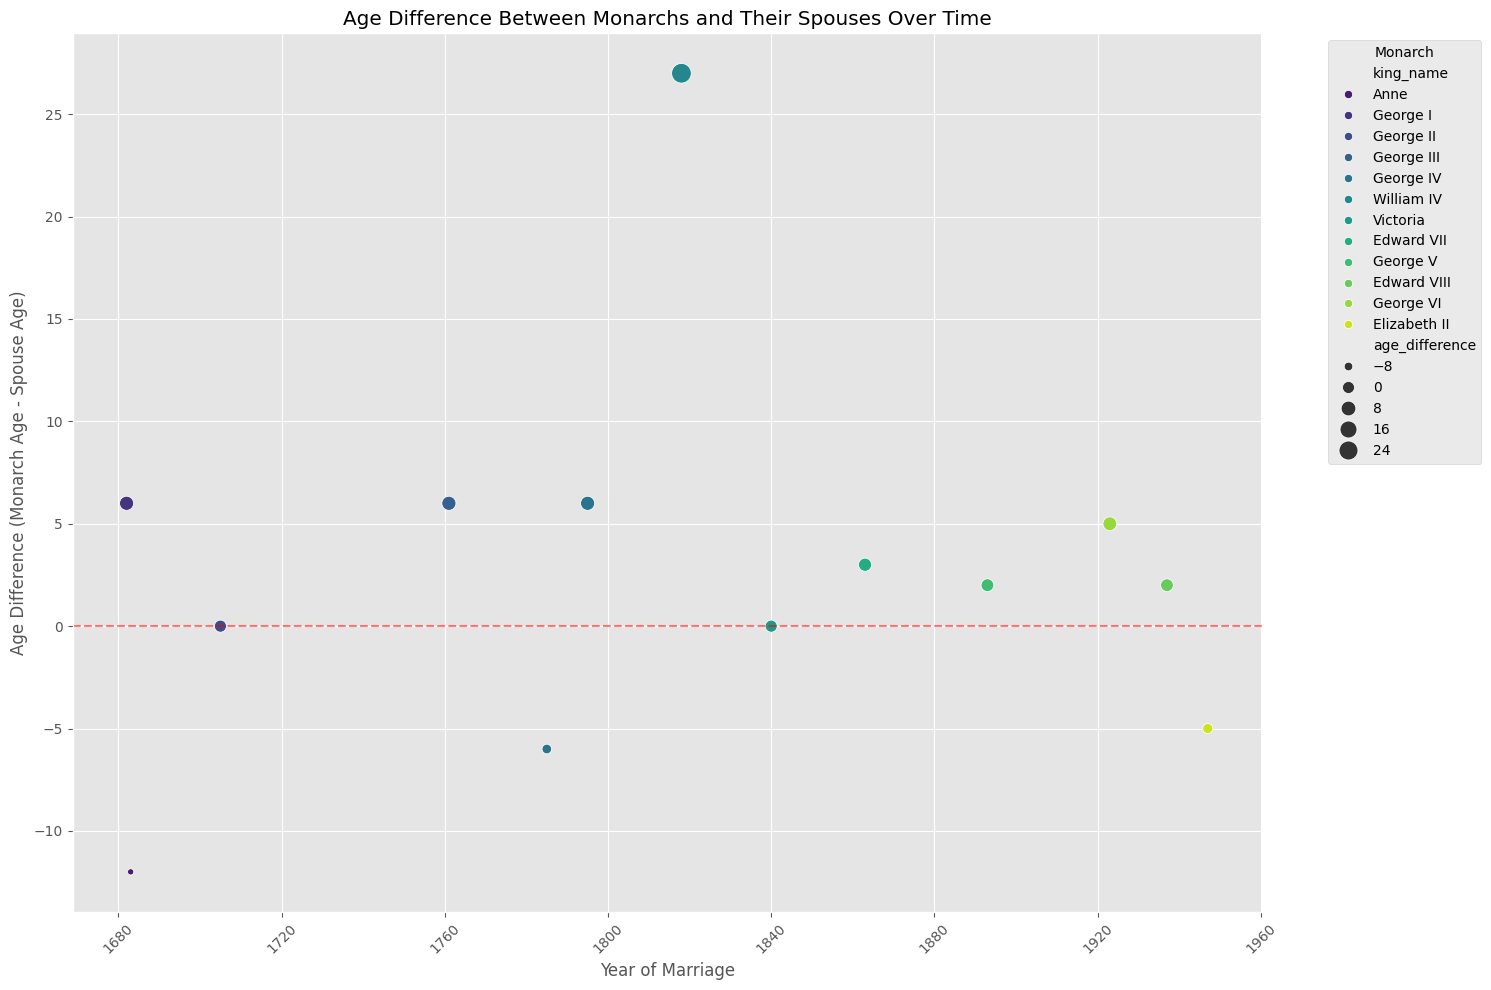

Earliest recorded marriage: 1682
Latest recorded marriage: 1947
Average age difference: 8.32 years
Median age difference: 6.00 years


In [15]:
# Convert 'year_of_marriage' to datetime
english_monarchs_marriages_df['year_of_marriage'] = pd.to_datetime(english_monarchs_marriages_df['year_of_marriage'], format='%Y', errors='coerce')

# Create a new figure
plt.figure(figsize=(15, 10))

# Create a scatter plot of age difference over time
sns.scatterplot(data=english_monarchs_marriages_df.dropna(subset=['year_of_marriage', 'age_difference']),
                x='year_of_marriage', y='age_difference',
                hue='king_name', size='age_difference',
                sizes=(20, 200), palette='viridis')

# Customize the plot
plt.title('Age Difference Between Monarchs and Their Spouses Over Time')
plt.xlabel('Year of Marriage')
plt.ylabel('Age Difference (Monarch Age - Spouse Age)')

# Add a horizontal line at y=0 to show where ages are equal
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend(title='Monarch', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

# Print some statistics about age differences over time
print(f"Earliest recorded marriage: {english_monarchs_marriages_df['year_of_marriage'].min().year}")
print(f"Latest recorded marriage: {english_monarchs_marriages_df['year_of_marriage'].max().year}")
print(f"Average age difference: {english_monarchs_marriages_df['age_difference'].mean():.2f} years")
print(f"Median age difference: {english_monarchs_marriages_df['age_difference'].median():.2f} years")
